<a href="https://colab.research.google.com/github/Luanffca/Machine-Learning/blob/main/Particle_Swarm_Optimization_(PSO)_Pr%C3%A1tica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import math

def create_benchmark(function):

  if function == "Himmelblau":
    a=(-5,5)
    x, y = np.array(np.meshgrid(np.linspace(-5,5,100), np.linspace(-5,5,100)))
    def fx(x,y) : return (((x**2+y-11)**2) + (((x+y**2-7)**2)))
    return (((x**2+y-11)**2) + (((x+y**2-7)**2))),x,y,a,fx

  if function == "Salomon":
    a=(-10,10)
    x = np.arange(-100, 100)
    y = np.arange(-10, 10)
    x, y = np.meshgrid(x, y)
    r = x**2+y**2
    def fx(x,y) : return 1-np.cos(2 * np.pi * np.sqrt(x**2+y**2) + 0.1 * np.sqrt(x**2+y**2))
    return 1-np.cos(2 * np.pi * np.sqrt(r) + 0.1 * np.sqrt(r)),x,y,a,fx

  if function == "Objective":
    a = (0,5)
    x, y = np.array(np.meshgrid(np.linspace(0,5,100), np.linspace(0,5,100)))

    def fx(x,y) : return (x-3.14)**2 + (y-2.72)**2 + np.sin(3*x+1.41) + np.sin(4*y-1.73)
    return (x-3.14)**2 + (y-2.72)**2 + np.sin(3*x+1.41) + np.sin(4*y-1.73), x,y,a,fx

def update():

    "Function to do one iteration of particle swarm optimization"
    global V, X, pbest, pbest_obj, gbest, gbest_obj
    # Update params
    r1, r2 = np.random.rand(2)
    V = w * V + c1*r1*(pbest - X) + c2*r2*(gbest.reshape(-1,1)-X)
    X = X + V
    obj = fx(X[0], X[1])
    pbest[:, (pbest_obj >= obj)] = X[:, (pbest_obj >= obj)]
    pbest_obj = np.array([pbest_obj, obj]).min(axis=0)
    gbest = pbest[:, pbest_obj.argmin()]
    gbest_obj = pbest_obj.min()

def animate(i):
    "Steps of PSO: algorithm update and show in plot"
    title = 'Iteration {:02d}'.format(i)
    # Update params
    update()
    # Set picture
    ax.set_title(title)
    pbest_plot.set_offsets(pbest.T)
    p_plot.set_offsets(X.T)
    p_arrow.set_offsets(X.T)
    p_arrow.set_UVC(V[0], V[1])
    gbest_plot.set_offsets(gbest.reshape(1,-1))
    return ax, pbest_plot, p_plot, p_arrow, gbest_plot

In [ ]:
List_of_functions= ["Rosenbrock", "Rastgrin",
                    "Ackley","Sphere","Beale",
                    "Goldstein-Price","Booth",
                    "Bukin","Matyas","Levi",
                    "Himmelblau","Three hump camel",
                    "Easom","Cross in tray","Egg holder",
                    "McCormick","Schaffer","Stiblinski-tag",
                    "Salomon","Objective","Parabolic"] # Objective function is machinelearningmastery's term, I dont know original term

                    # Some function doesnt work properly
                      # Bukin, Salamon,
                    # You can read about this Benchmark test from:
                        # https://en.wikipedia.org/wiki/Test_functions_for_optimization
                    # I use base code from:
                        # https://machinelearningmastery.com/a-gentle-introduction-to-particle-swarm-optimization/
                    # The code is still not quite good. In the future, I intend to improve it further.
                        # I suggest before running the code read machinelearningmastery's article.
# Acknowledge: I would like to thank Prof. A.Egemen Yılmaz for explaining the basics of this subject to me.

In [ ]:
# Select test

z,x,y,a,fx = create_benchmark("Himmelblau") # I use Objective function default, because of original code source
# My best choice is absolutely Rastgrin

In [ ]:
# Find the global minimum
x_min = x.ravel()[z.argmin()]
y_min = y.ravel()[z.argmin()]
x_max = x.ravel()[z.argmax()]
y_max = y.ravel()[z.argmax()]

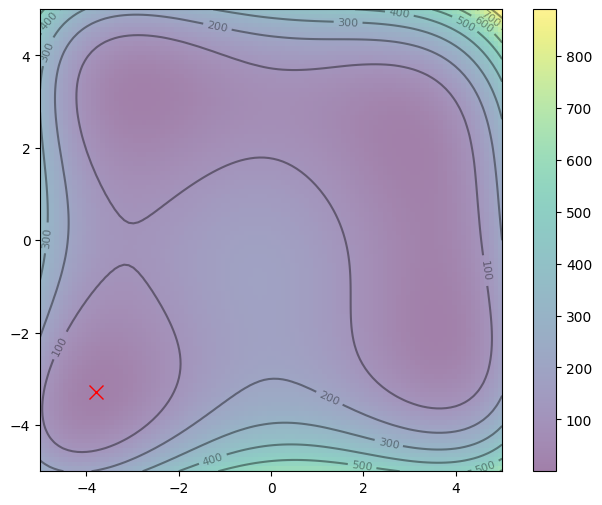

In [ ]:
plt.figure(figsize=(8,6))
plt.imshow(z, extent=[a[0],a[1],a[0],a[1]], origin='lower', cmap='viridis', alpha=0.5)
plt.colorbar()
plt.plot([x_min], [y_min], marker='x', markersize=10, color="red")
contours = plt.contour(x, y, z, 10, colors='black', alpha=0.4)
plt.clabel(contours, inline=True, fontsize=8, fmt="%.0f")
plt.show()

In [ ]:
# Hyper-parameter of the algorithm
c1 = 0.5
c2 = 0.5
w = 0.6

In [ ]:
# Create particles
n_particles = 40
np.random.seed(100)
# Values of particles
X = np.random.rand(2, n_particles) * 5
# Set random velocity for each particle
V = np.random.randn(2, n_particles) * 0.1

In [ ]:
# Initialize data
pbest = X
pbest_obj = fx(X[0], X[1])
gbest = pbest[:, pbest_obj.argmin()]
gbest_obj = pbest_obj.min()

(-5.0, 5.0)

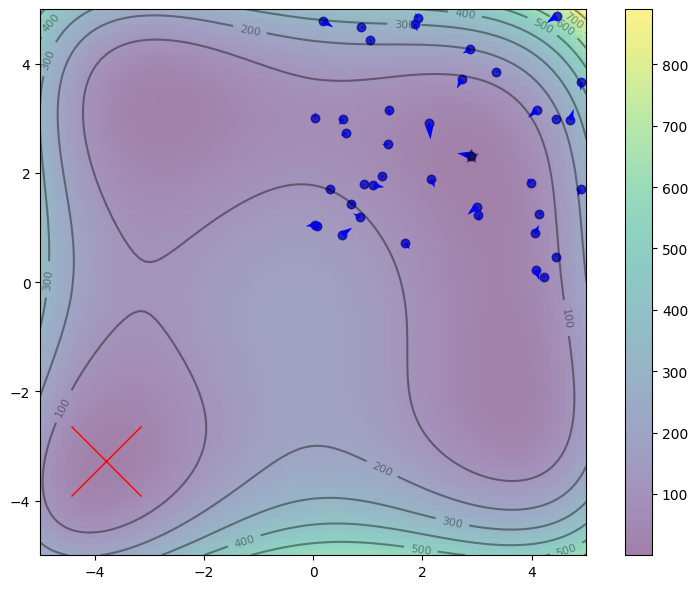

In [ ]:
# Set up base figure: The contour map
fig, ax = plt.subplots(figsize=(8,6))
fig.set_tight_layout(True)

img = ax.imshow(z, extent=[a[0],a[1],a[0],a[1]], origin='lower', cmap='viridis', alpha=0.5)
fig.colorbar(img, ax=ax)
ax.plot([x_min], [y_min], marker='x', markersize=50, color="red")
contours = ax.contour(x, y, z, 10, colors='black', alpha=0.4)
ax.clabel(contours, inline=True, fontsize=8, fmt="%.0f")
pbest_plot = ax.scatter(pbest[0], pbest[1], marker='o', color='black', alpha=0.5)
p_plot = ax.scatter(X[0], X[1], marker='o', color='blue', alpha=0.5)
p_arrow = ax.quiver(X[0], X[1], V[0], V[1], color='blue', width=0.005, angles='xy', scale_units='xy', scale=1)
gbest_plot = plt.scatter([gbest[0]], [gbest[1]], marker='*', s=100, color='black', alpha=0.4)
ax.set_xlim([a[0],a[1]])
ax.set_ylim([a[0],a[1]])


In [ ]:
# This score is just first iteration, please check again score after the animation.

print("PSO found best solution at fx({})={}".format(gbest, gbest_obj))
print("Global optimal at fx({})={}".format([x_min,y_min], fx(x_min,y_min)))

PSO found best solution at fx([2.8845075  2.31749009])=1.7068328732571252
Global optimal at fx([-3.787878787878788, -3.282828282828283])=0.00436989114706011


In [ ]:
# Set iteration of update function and frame interval

iteration = list(range(1,50))
anim = FuncAnimation(fig, animate, frames=iteration, interval=100, blit=False, repeat=True)
anim
from IPython.display import HTML
HTML(anim.to_html5_video())

# If you run this code one more time; I suggest restart all code.
# Because of updateing code implemented in animation code.

In [ ]:
print("PSO found best solution at fx({})={}".format(gbest, gbest_obj))
print("Global optimal at fx({})={}".format([x_min,y_min], fx(x_min,y_min)))

PSO found best solution at fx([3.00000005 1.99999985])=3.347120896253231e-13
Global optimal at fx([-3.787878787878788, -3.282828282828283])=0.00436989114706011
